# Problem 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log
from __future__ import division
import scipy.sparse as sp
import pdb
import matplotlib.patches as mpatches

In [2]:
def myCooDescent(w0,w,y,X,lyambda):
    # LASSO with coordinate descent
    # Subset selection
    # From HW1
    
    N,d=X.shape
    wOld=w #keep for computations
    wNew=wOld 
    kmax=50 #max number of iterations
    eps=10**(-3) # for convergence
    w0old=w0
    
    for kk in range(kmax):
        errorOld=np.square(np.linalg.norm(y-X*wOld-w0old, ord=2))+lyambda*np.linalg.norm(wOld, ord=1)
        
        yhat=X*wOld+w0old
        w0new=np.sum(y-yhat+w0old)/N
        yhat=yhat-w0old+w0new
    
        for jj in range(d):
            start, end = X.indptr[jj], X.indptr[jj+1]
            aj=2*np.sum(np.square(X.data[start:end]))
            
            cj=2*np.sum(X.data[start:end]*(y[X.indices[start:end]]-\
                                               yhat[X.indices[start:end]]+X.data[start:end]*wOld[jj]))
            if cj+lyambda<0:
                wNew[jj]=(cj+lyambda)/aj
            elif cj-lyambda>0:
                wNew[jj]=(cj-lyambda)/aj
            else:
                wNew[jj]=0
                
        if np.linalg.norm(wNew-wOld,ord=np.inf)<eps:
            return (w0,wNew)
        else:
            wOld=wNew
            w0old=w0new
            
        errorNew=np.square(np.linalg.norm(y-X*wNew-w0, ord=2))+lyambda*np.linalg.norm(wNew, ord=1)
        if errorOld-errorNew<10**(-3):
            print('error grows', jj)
                
    if kk==kmax-1:
        print('reached max iter')
        return (w0, wNew)
            

### 1.1

(100, 7.3759133805173546e-07)
(200, 4.3366851522418326e-07)
(300, 2.6119407884514379e-07)
(400, 1.8458577348482933e-07)
(500, 1.3268964034008097e-07)
(600, 1.1957668245176783e-07)
(700, 8.7114254654872846e-08)
(800, 7.637212161691271e-08)
(900, 7.1199953216071782e-08)


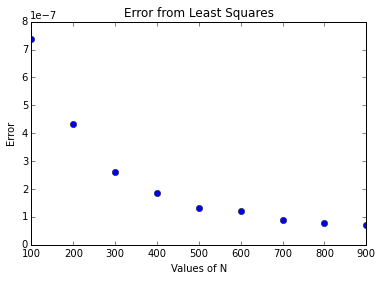

In [3]:
# Generate data
N,d=1000,50;
w=np.ones(d)
Xbig=np.random.randn(N,d)
noise=0.001*np.random.randn(N)
Y=Xbig.dot(w)+noise
Renj=range(N)
valsN=Renj[100::100] # choose different n to fit the data
error=np.zeros(len(valsN))
k=0
for n in valsN:
    X=Xbig[0:n,:];
    w_ls=np.linalg.lstsq(X, Y[0:n])[0]
    error[k]=np.linalg.norm(w_ls-w, ord=2)**2
    k+=1
    print(n,error[k-1] )
plt.plot(valsN,error, 'bo')
plt.xlabel('Values of N')
plt.ylabel('Error')
plt.title('Error from Least Squares')

The more data you have the better fit you get for the parameters. It seems to decrese exponentially.

### 1.2

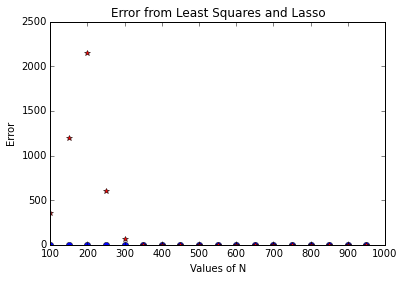

In [4]:
N,d=1000,50;
w=np.zeros(d)
w[0]=5
Xbig=np.random.randn(N,d)
noise=0.001*np.random.randn(N)
Y=Xbig.dot(w)+noise
R=range(N)
valsN=R[100::50]#, 2000, 5000, 6000, 7000, 9000, 10000]
k,w0=0,0
w_guess=np.random.randn(d)
errorLS=np.zeros(len(valsN))
errorCD=np.zeros(len(valsN))
Xsparse=sp.csc_matrix(Xbig)
lyambda=0.9
for n in valsN:
    X=Xsparse[0:n,:];
    XLS=Xbig[0:n,:];
    w_ls=np.linalg.lstsq(XLS, Y[0:n])[0]
    errorLS[k]=np.linalg.norm(w_ls-w, ord=2)**2
    
    for jj in range(5):
            w0,w_guess=myCooDescent(w0,w_guess,Y[0:n],X,lyambda)
            lyambda=0.9*lyambda
                        
    errorCD[k]=np.linalg.norm(w_guess-w, ord=2)**2
    k+=1


plt.plot(valsN,errorLS, 'bo')
plt.plot(valsN,errorCD, 'r*')
plt.xlabel('Values of N')
plt.ylabel('Error')
plt.title('Error from Least Squares and Lasso')

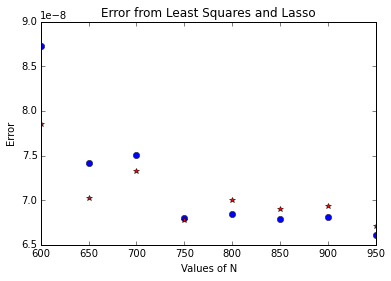

In [5]:
plt.plot(valsN[10:],errorLS[10:], 'bo')
plt.plot(valsN[10:],errorCD[10:], 'r*')
plt.xlabel('Values of N')
plt.ylabel('Error')
plt.title('Error from Least Squares and Lasso')

The red stars represent the error $||w_{guess}-w||$ from Lasso algorithm implemented using coordinate decent and blue circles are the error from least squares for different Values of N.

Clearly, the Least Squares is the best possible fit when our data represents a line with Gaussian noise. Therefore, it makes sense that lasso gave worse Result then Least squares.

#Problem 2


In [6]:
#load data
%run start.py
training_data = genfromtxt('train.txt', delimiter=',')
oversampled=genfromtxt('oversampled_train.txt', delimiter=',')
Y_train = training_data[:,0]
X_train = training_data[:, 1:]
Y_trainOversample=oversampled[:,0]
X_trainOversample=oversampled[:,1:]
Y_test = genfromtxt('test_label.txt', delimiter=',')
X_test = genfromtxt('test.txt', delimiter=',')

Susie


In [7]:
def LogLoss(w0,w,X,Y,N):
#     if N>1:
#         sumLog=np.sum(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
#     else:
#         sumLog=(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
    sumLog=(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
    logloss=0.5*lam*np.linalg.norm(w, ord=2)**2+sumLog/N
#     pdb.set_trace()
    return logloss
    

In [8]:
def myBatch_GD(w0, w, X, y, eta, lyambda,N):
    #algorithm to do linear regression with batch gradient decent
    # minimizes log loss function:
    #     l(x,w0,w)=0.5*lyambda*norm(w,2)**2-1/N*sum(ln(P(y_j|X_j,w0,w)))
    #INPUT: w0 - scalar, initial guess for offset term
    # w - d dimentional vector, initial guess for w
    # X- Nxd matrix
    # y- N dimentional lables
    # eta - how much to move in gradient direction
    # lyambda -  regularizer
    #OUTPUT: w0 and w

    numerator=exp(X.dot(w)+w0)
    denominator=1+numerator
    dl0=np.sum(numerator/denominator-y) # derivative wrt w0
    dl=X.T.dot(-y+numerator/denominator) #derivative wrt w vector 
    
    w0=w0-eta*dl0/N; #update w0
    w=w-eta*(lyambda*w+dl/N)
    return (w0, w)

In [9]:
def Batch_GD(w0, w, X, Y, eta, lam, nloop):
    # performs Batch Gradient Descent  algorithms 
    # updating w, w0 nloop times
    # also returns logloss function
    
    logLoss=np.zeros(nloop)
    N=Y.shape
    for k in range(nloop):
        w0,w=myBatch_GD(w0, w, X, Y, eta, lam,N)
#         ll=LogLoss(w0,w,X,Y,N)
#         logLoss[k]=ll
#         logloss[k]=LogLoss(w0,w,X,Y,N)
        sumLog=np.sum(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
        logLoss[k]=0.5*lam*np.linalg.norm(w, ord=2)**2+sumLog/N
    return (w0,w,logLoss)

In [10]:
def prediction(w0, w, X):
    # given w0,w and X 
    # calculates prediction for Y, which is 0 if 
    # exp(w0+X*w)/(1+exp(w0+X.w))<0.5 and 1 otherwise
    n,d=X.shape
    top=exp(w0+X.dot(w))
    bottom=1+top
    prob=top/bottom
    predict=np.zeros(n)
    predict[prob>=0.5]=1
    return predict

In [11]:
def SumSquaredError(w0, w,X, Y):
    # calculates the sum of squared error of prediction and real data
    pred=prediction(w0,w,X)
    SumSquaredError=np.linalg.norm(Y-pred, ord=2)**2
    return SumSquaredError

In [12]:
def convergeBDG(w0,w,X,Y,eta,lam):
    # implements Batch Gradient Descent Algorithm
    # with convergence criterion |logloss(k)-logloss(k-1)|<eps
    N=Y.shape
    logLoss=np.zeros(Y.shape)
#     ll=LogLoss(w0,w,X,Y,N)
#     logLoss[0]=ll
    sumLog=np.sum(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
    logLoss[0]=0.5*lam*np.linalg.norm(w, ord=2)**2+sumLog/N
    s,k,eps=1, 1, 5*10**(-4)
    while s>=eps:
        w0,w=myBatch_GD(w0, w, X, Y, eta, lam,N)
        sumLog=np.sum(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
        logLoss[k]=0.5*lam*np.linalg.norm(w, ord=2)**2+sumLog/N
#         logLoss[k]=LogLoss(w0,w,X,Y,N)
#         ll=LogLoss(w0,w,X,Y,N)
#         logLoss[k]=ll
        s=abs(logLoss[k]-logLoss[k-1])
        k+=1
    print k-1
    return(w0,w,logLoss[0:k-1])

In [13]:
def StochGD(w0,w,X,Y,eta,lam):
    # Implements Stochastic Gradient Descent
    # using only one data point to update the gradient and therefore w
    
    N,d=X.shape
    logLoss=np.zeros(N)
    for k in range(N):
        w0,w=myBatch_GD(w0, w, X[k,:], Y[k], eta, lam, N)
        sumLog=np.sum(-Y*((X.dot(w)+w0).T)+log(1+exp(w0+X.dot(w))))
        logLoss[k]=0.5*lam*np.linalg.norm(w, ord=2)**2+sumLog/N
#     ll=LogLoss(w0,w,X,Y,N)
#     pdb.set_trace()
#     logLoss[k]=ll    

    return (w0,w, logLoss)

In [14]:
def PrecisionRecall(pred, Y):
    my0Pred=sum(pred==0)
    my1Pred=sum(pred==1)

    true0=sum(Y==0)
    true1=sum(Y==1)

    true0Pred=0
    true1Pred=0
    for k in range(len(Y)):
        if pred[k]==Y[k]:
            if pred[k]==0:
                true0Pred+=1
            else:
                true1Pred+=1

    #precision
    if my0Pred==0:
        precision0=0
    else:
        precision0=true0Pred/my0Pred

    if my1Pred==0:
        precision1=0
    else:
        precision1=true1Pred/my1Pred

    recall0=true0Pred/true0
    recall1=true1Pred/true1


    print('precision for 0 ', precision0, 'precision for 1 ', precision1)
    print('recall for 0 ', recall0, 'recall for 1 ', recall1)


## 2.4

###2.4.1
#####The update for Batch Gradient Descent is:

$w^{t+1}=w^t-\eta*\bigtriangledown l$, where 

$\bigtriangledown l= \lambda w- \frac{1}{N}X \cdot [-y+\frac{e^{Xw+w0}}{1+e^{Xw+w0}}]$

$X$  is a matrix, $y$ is a vector

###2.4.2

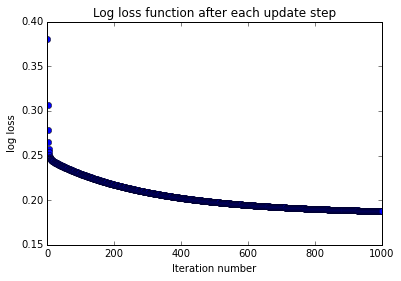

In [15]:
# initial conditins
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
nloop=1000
# run Batch Gradient Descent
w0,w_guess,LL=Batch_GD(w0, w_guess, X_train, Y_train, eta, lam, nloop)
plt.plot(LL,'bo', label=r'log loss');
plt.xlabel('Iteration number')
plt.ylabel('log loss ')
plt.title('Log loss function after each update step')

In [16]:
sse=SumSquaredError(w0, w_guess,X_test, Y_test)
print('Sum squared error for BDG with 1000 iterations', sse)

('Sum squared error for BDG with 1000 iterations', 54.0)


##2.4.3

13


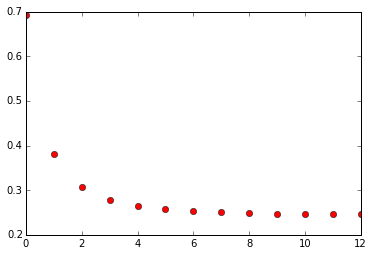

In [17]:
#implement BDG with stoping criteria
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
w0,w_guess,LogLoss=convergeBDG(w0,w_guess,X_train,Y_train,eta,lam)
plt.plot(LogLoss,'ro', label=r'log loss');


In [18]:
sse=SumSquaredError(w0, w_guess,X_test, Y_test)
print('Sum squared error for BDG with 1000 iterations', sse)

('Sum squared error for BDG with 1000 iterations', 54.0)


Converged in 13 iterations with SSE=54

##2.5

###2.5.1

##### The update for Stochastic Gradient Descent is:

$w^{t+1}=w^t-\eta*\bigtriangledown l$, where 

$\bigtriangledown l= \lambda w- X_{j_0} \cdot 
[-y_{j_0}+\frac{e^{X_{j_0}w+w0}}{1+e^{X_{j_0}w+w0}}]$

$X_{j_0}$  is a vector, $y_{j_0}$ is a number, i.e. $(X_{j_0},y_{j_0})$ is one data point

###2.5.2 (a)


### $\lambda=0$

In [ ]:
#for lambda =0
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0
w0, w_guess, LL = StochGD(w0,w_guess,X_train,Y_train,eta,lam)
nrm=np.linalg.norm(w_guess, ord=2)
print('when lambda=0 the L2 norm of weight vector is', nrm)

plt.plot(LL,'ro', label=r'log loss')
plt.title('Log loss function')

### $\lambda=0.3$

In [ ]:
#for lambda =0.3
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
w0, w_guess, LL =StochGD(w0,w_guess,X_train,Y_train,eta,lam)
nrm=np.linalg.norm(w_guess, ord=2)
print('when lambda=0 the L2 norm of weight vector is',nrm)
plt.plot(LL,'ro', label=r'log loss')
plt.title('Log loss function')

###2.5.2 (b)

In [ ]:
sse=SumSquaredError(w0, w_guess,X_test, Y_test)
print('Sum squared error for SDG', sse)

###2.5.3

In [ ]:
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
for k in range(5):
    w0, w_guess, LL =StochGD(w0,w_guess,X_train,Y_train,eta,lam)
    
plt.plot(LL,'ro', label=r'log loss')
plt.title('Log loss function')

In [ ]:
# initial conditins
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
nloop=1000
# run Batch Gradient Descent 5 times
for jj in range(5):
    w0,w_guess,LL=Batch_GD(w0, w_guess, X_train, Y_train, eta, lam, nloop)
plt.plot(LL,'bo', label=r'log loss');
plt.xlabel('Iteration number')
plt.ylabel('log loss ')
plt.title('Log loss function')

Batch Gradient Descent converges faster

###2.6.1

In [ ]:
# initial conditins
N,d=X_train.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.1, 0.3
nloop=5000
# run Batch Gradient Descent
w0,w_guess,LL=Batch_GD(w0, w_guess, X_train, Y_train, eta, lam, nloop)
predict=prediction(w0,w_guess,X_test)
PrecisionRecall(predict, Y_test)

###2.6.2

In [26]:
N,d=X_trainOversample.shape
w0=0
w_guess=np.zeros(d)
eta, lam=0.01, 0.3
nloop=5000
w0,w_guess,LL=Batch_GD(w0, w_guess, X_trainOversample, Y_trainOversample, eta, lam, nloop)
predict=prediction(w0,w_guess,X_test)
PrecisionRecall(predict, Y_test)

('precision for 0 ', 0.93799472295514508, 'precision for 1 ', 0.028925619834710745)
('recall for 0 ', 0.7515856236786469, 'recall for 1 ', 0.12962962962962962)
